Time warping is applied via the function
`sparse image warp` of tensorflow. Given
a log mel spectrogram with τ time steps, we view it
as an image where the time axis is horizontal and the
frequency axis is vertical. A random point along the
horizontal line passing through the center of the image
within the time steps (W, τ − W) is to be warped
either to the left or right by a distance w chosen from a
uniform distribution from 0 to the time warp parameter
W along that line. W: 80


In [1]:
import numpy as np
import tensorflow as tf

In [2]:
# !pip install librosa

In [3]:
import librosa
import librosa.display

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import random

In [5]:
sess = tf.InteractiveSession()

In [6]:
tf.__version__

'1.12.0'

In [7]:
y, sr = librosa.load(librosa.util.example_audio_file(), duration=5.0)
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)

In [8]:
S.shape

(128, 216)

## Time warping

In [44]:
# Source
W = 80
f, t = S.shape # n_freq, timesteps

pt = random.randint(W, t-W) # random point
src_ctr_pt_y = np.arange(f) # control points on y-axis
src_ctr_pt_x = np.ones_like(src_ctr_pt_y)*pt # control points on x-axis
src_ctr_pts = np.stack((src_ctr_pt_y, src_ctr_pt_x), -1)

In [61]:
# Destination
w = random.randint(-W, W) # distance
dest_ctr_pt_y = src_ctr_pt_y
dest_ctr_pt_x = src_ctr_pt_x + w
dest_ctr_pts = np.stack((dest_ctr_pt_y, dest_ctr_pt_x), -1)

In [62]:
src_ctr_pts

array([[  0, 120],
       [  1, 120],
       [  2, 120],
       [  3, 120],
       [  4, 120],
       [  5, 120],
       [  6, 120],
       [  7, 120],
       [  8, 120],
       [  9, 120],
       [ 10, 120],
       [ 11, 120],
       [ 12, 120],
       [ 13, 120],
       [ 14, 120],
       [ 15, 120],
       [ 16, 120],
       [ 17, 120],
       [ 18, 120],
       [ 19, 120],
       [ 20, 120],
       [ 21, 120],
       [ 22, 120],
       [ 23, 120],
       [ 24, 120],
       [ 25, 120],
       [ 26, 120],
       [ 27, 120],
       [ 28, 120],
       [ 29, 120],
       [ 30, 120],
       [ 31, 120],
       [ 32, 120],
       [ 33, 120],
       [ 34, 120],
       [ 35, 120],
       [ 36, 120],
       [ 37, 120],
       [ 38, 120],
       [ 39, 120],
       [ 40, 120],
       [ 41, 120],
       [ 42, 120],
       [ 43, 120],
       [ 44, 120],
       [ 45, 120],
       [ 46, 120],
       [ 47, 120],
       [ 48, 120],
       [ 49, 120],
       [ 50, 120],
       [ 51, 120],
       [ 52,

In [63]:
dest_ctr_pts

array([[  0, 147],
       [  1, 147],
       [  2, 147],
       [  3, 147],
       [  4, 147],
       [  5, 147],
       [  6, 147],
       [  7, 147],
       [  8, 147],
       [  9, 147],
       [ 10, 147],
       [ 11, 147],
       [ 12, 147],
       [ 13, 147],
       [ 14, 147],
       [ 15, 147],
       [ 16, 147],
       [ 17, 147],
       [ 18, 147],
       [ 19, 147],
       [ 20, 147],
       [ 21, 147],
       [ 22, 147],
       [ 23, 147],
       [ 24, 147],
       [ 25, 147],
       [ 26, 147],
       [ 27, 147],
       [ 28, 147],
       [ 29, 147],
       [ 30, 147],
       [ 31, 147],
       [ 32, 147],
       [ 33, 147],
       [ 34, 147],
       [ 35, 147],
       [ 36, 147],
       [ 37, 147],
       [ 38, 147],
       [ 39, 147],
       [ 40, 147],
       [ 41, 147],
       [ 42, 147],
       [ 43, 147],
       [ 44, 147],
       [ 45, 147],
       [ 46, 147],
       [ 47, 147],
       [ 48, 147],
       [ 49, 147],
       [ 50, 147],
       [ 51, 147],
       [ 52,

In [56]:
# TF
image = tf.expand_dims(tf.expand_dims(tf.convert_to_tensor(S, tf.float32), 0), -1) # (B, H, W, C)
source_control_point_locations = tf.expand_dims(tf.convert_to_tensor(src_ctr_pts, tf.float32), 0) # (B, f//2, 2)
dest_control_point_locations = tf.expand_dims(tf.convert_to_tensor(dest_ctr_pts, tf.float32), 0) # (B, f//2, 2)

In [57]:
warped_image, _ = tf.contrib.image.sparse_image_warp(image, 
                                                     source_control_point_locations, 
                                                     dest_control_point_locations)

## Plot

In [58]:
_warped_image = warped_image.eval()

In [59]:
_S = np.squeeze(_warped_image)
_S.shape

(128, 216)

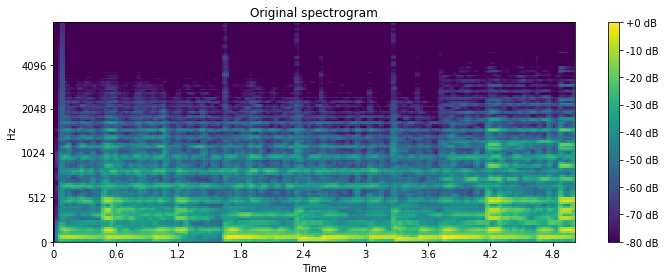

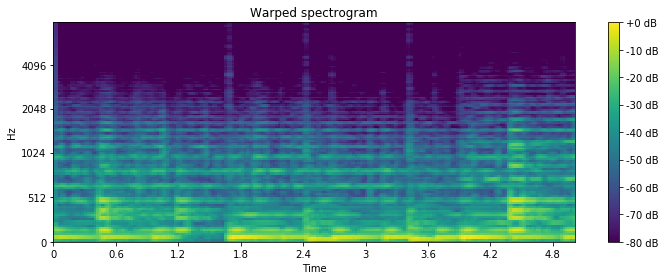

In [60]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S,
                                              ref=np.max),
                         y_axis='mel', fmax=8000, cmap='viridis',
                        x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Original spectrogram')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(_S,
                                              ref=np.max),
                         y_axis='mel', fmax=8000, cmap='viridis',
                        x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Warped spectrogram')
plt.tight_layout()
plt.show()
